# Scatterplot

This experiment aims to use scatterplot visualisations to display correlations about water related problems and it's possible reasons in an intuitive way.

Especially, we try to explore the counterintuitive reverse-relationship between water stress and challenges like limited access to clean drinking water and undernourishment in various countries.

Jump down to see the plots, jump to the end to see the conclusion.

### Imports & Dataset

In [1]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
from tueplots import bundles
from tueplots.constants.color import rgb

from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap

sys.path.insert(1, os.path.abspath(os.getcwd()[:-3]))
from src.aquastat_utils import get_aquastat
from src.aquastat_utils import AQUASTAT_SOURCE
from src.utils import save_fig

df = get_aquastat()

Getting AQUASTAT dataframe from fao_aquastat.csv ...
/Users/josef/Sync/Dokumente/SCHULE/Master/UT/Vorlesungen/Sem2/Data_Literacy/Paper/src/../dat/fao_aquastat.csv already exists.
Getting AQUASTAT dataframe from fao_aquastat.csv ...
/Users/josef/Sync/Dokumente/SCHULE/Master/UT/Vorlesungen/Sem2/Data_Literacy/Paper/src/../dat/fao_aquastat.csv already exists.
Renaming countries ...


### Function for drawing the scatterplot

In [2]:
# create custom color map (code from global_water_withdrawal)
RGB1 = [0, 0, 150]  # dark blue
RGB2 = [150, 0, 0]  # dark red

N = 256  #number of discrete levels
vals = np.ones((N, 4))

vals[:, 0] = np.linspace(RGB1[0] / 256, RGB2[0] / 256, N)
vals[:, 1] = np.linspace(RGB1[1] / 256, RGB2[1] / 256, N)
vals[:, 2] = np.linspace(RGB1[2] / 256, RGB2[2] / 256, N)

# finally, create the required colormap that ranges from
# -- dark blue to pale green
custom_cmap = ListedColormap(vals)

custom_cmap = LinearSegmentedColormap.from_list(
    "rb", [[0, 0, 153 / 255, 1], [51 / 255, 133 / 255, 220 / 255, 1], [220 / 255, 0 / 255, 0, 1], [128 / 255, 0, 0, 1]],
    N=500
)



def scatterplot(variables, year: int, title: str, sizes=False, extend='neither'):
    """
    Returns the sum of two decimal numbers in binary digits.

            Parameters:
                    variables (list(string))): List containing 2/3 variable names (color will be used to represent the 3rd one, if present)
                    year (int): A single year to use the data from
                    sizes (boolean): Dots are sized according to the 3rd variable if set to true
                    extend (neither/min/max/both): Shape of the end of the colorbar

            Draw a scatterplot of the specified data
    """
    #TODO: update fontsize, add source

    data = df[['Country', 'Year', *variables]]
    data = data[data['Year'] == year]
    # Exclude certain countries which blow up the diagram
    countries_to_exclude = ["Qatar", "Kuwait", "United Arab Emirates", "Saudi Arabia", "Libya", "Yemen"]
    data = data[~data['Country'].isin(countries_to_exclude)]
    data = data.dropna()

    settings = plt.rcParams.copy()
    plt.rcParams.update(bundles.icml2022(column='half', nrows=1, ncols=1))
    plt.rcParams.update({"figure.dpi": 200})

    # Create a scatter plot
    fig, ax = plt.subplots()

    # Initialize lists to store values for each country
    x_values = []
    y_values = []
    color_values = []
    countries = []

    # Iterate through the DataFrame
    for index, row in data.iterrows():
        country = row['Country']
        x_values.append(row[variables[0]])
        y_values.append(row[variables[1]])
        if len(variables) == 3:
            color_values.append(row[variables[2]])
        countries.append(country)

    # Call plt.scatter once outside the loop
    if sizes and len(variables) == 3:
        ax.scatter(x_values, y_values, color_values, c=color_values, cmap=custom_cmap, label=countries, s=4)
    elif len(variables) == 3:
        ax.scatter(x_values, y_values, c=color_values, cmap=custom_cmap, label=countries, s=4)
    else:
        dark_blue = [0 / 255, 0 / 255, 150 / 255]
        ax.scatter(x_values, y_values, label=countries, s=4, color=dark_blue)

    # Show text labels. Should only be used to find the country of a specific dot
    #plt.text(x_values, y_values, countries, fontsize=6, ha='right')

    # Add labels and title
    # Format label text
    substrings = [
        ["SDG 6.4.2. Water Stress", "Water Stress [\\%]"],
        ["Total population with access to safe drinking-water (JMP)", "Population with access to safe drinking-water [\\%]"],
        [" (NRI)", ""],
        [" (3-year average)", ""],
        ["GDP per capita", "GDP per capita [\\$]"]]
    
    axis = variables
    for i, j in substrings:
        axis[0] = axis[0].replace(i, j)
        axis[1] = axis[1].replace(i, j)
    ax.set_xlabel(axis[0])
    ax.set_ylabel(axis[1])

    # Add light grey grid
    ax.grid(True, which='major', color=rgb.tue_gray, alpha=0.8, linewidth=0.1)

    # Add color bar
    if len(variables) == 3:
        cbar = fig.colorbar(ax.collections[0], extend=extend)
        cbar.set_label(variables[2])

    # Add source
    ax.text(0.99, 0.01, AQUASTAT_SOURCE, fontsize='xx-small', transform=ax.transAxes, ha='right', va='bottom',
            color=rgb.tue_gray)

    # Add title
    ax.set_title(title)

    # Show the plot
    plt.show()

    # Save figures as pdf
    save_fig(fig, title, 'scatterplots', experimental=True)
    
    # Reset settings
    plt.rcParams.update(settings)


<br>
<br>
<br>
<br>
<hr>
<br>

# scatterplots
Each dot in the following plots represents one country. The countries of the Arabian peninsula and Lybia have been removed due to their extreme values.

In [3]:
'''Set the year to use for the plots'''
year = 2020

### water stress - undernourishment

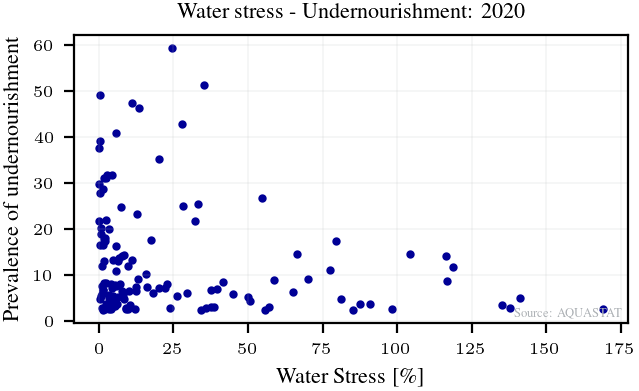

Saving figure to fig/scatterplots/fig_Water stress - Undernourishment: 2020.pdf ... Done!


In [4]:
relevant_vars = ['SDG 6.4.2. Water Stress',
                 'Prevalence of undernourishment (3-year average)']

scatterplot(relevant_vars, year, title='Water stress - Undernourishment: {}'.format(year), extend='max')

### water stress - access to clean water

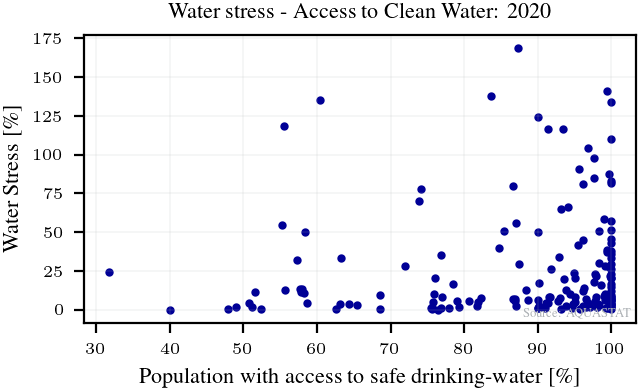

Saving figure to fig/scatterplots/fig_Water stress - Access to Clean Water: 2020.pdf ... Done!


In [5]:
relevant_vars = ['Total population with access to safe drinking-water (JMP)',
                 'SDG 6.4.2. Water Stress']

scatterplot(relevant_vars, year, title='Water stress - Access to Clean Water: {}'.format(year), extend='max')

### GDP per capita - access to clean water

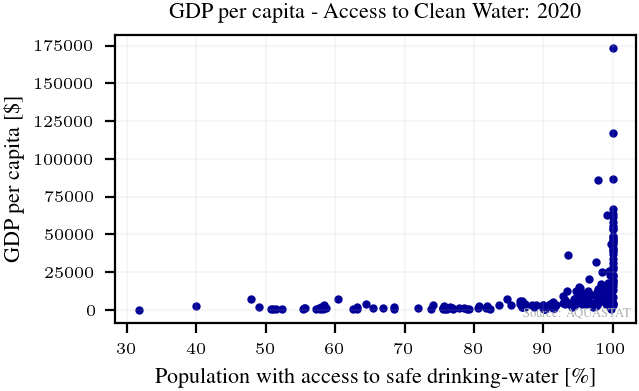

Saving figure to fig/scatterplots/fig_GDP per capita - Access to Clean Water: 2020.pdf ... Done!


In [6]:
relevant_vars = ['Total population with access to safe drinking-water (JMP)',
                 'GDP per capita']

scatterplot(relevant_vars, year, title='GDP per capita - Access to Clean Water: {}'.format(year))

### rainfall - access to clean water

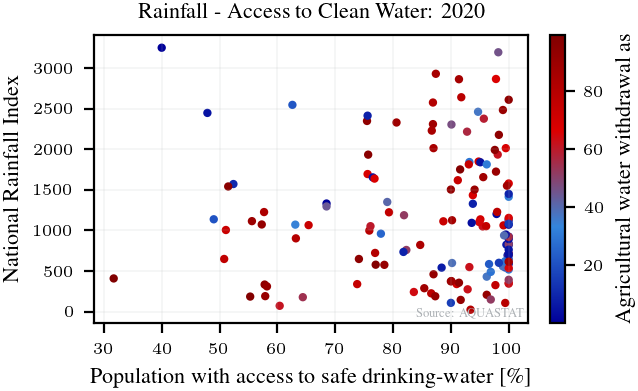

Saving figure to fig/scatterplots/fig_Rainfall - Access to Clean Water: 2020.pdf ... Done!


In [7]:
relevant_vars = ['Total population with access to safe drinking-water (JMP)',
                 'National Rainfall Index (NRI)',
                 'Agricultural water withdrawal as % of total water withdrawal']

scatterplot(relevant_vars, year, title='Rainfall - Access to Clean Water: {}'.format(year))

# Statistics
First, let's look at a simple correlation:

In [8]:
# code taken and modified from exp_population_hypothesis_test

# filter the latest data for the year 2020
filt_df = df[df['Year'] == year]
# select relevant variables
filt_df = filt_df[
    ['Country', 'Total population with access to safe drinking-water (JMP)', 'SDG 6.4.2. Water Stress']]
# drop all rows where no data is available (where NaNs occur)
filt_df = filt_df.dropna()
filt_df.head()

corr = filt_df['Total population with access to safe drinking-water (JMP)'].corr(
    filt_df['SDG 6.4.2. Water Stress'])
print(
    'The correlation between the Total population with access to safe drinking-water and the National Rainfall Index:')
print(corr)

The correlation between the Total population with access to safe drinking-water and the National Rainfall Index:
0.07236869922616175


# Conclusion

On the one hand, many factory like the amount of rainfall don't seem to have a direct influence on the access to clean drinking water at all. Neither does the share of water used for irrigation or municipalities affect the access to clean drinking water or undernourishment.

There seems to be a little correlation between freshwater withdrawal in regards of the total renewable water resources and access to clean drinking water. Countries which struggle to provide clean water to their citizens often use a lower share of the naturally available water resources.

**Therefore, high water scarcity or stress doesn't seem to be a good indicator for the water related problems like access to clean drinking water and undernourishment**.

The most important effect on access to clean drinking water seems to be the GDP per capita.

Therefore, it appears that countries with poor access to clean drinking water suffer not from a scarcity of water, but rather [conclusion, (sources?)] from significant challenges in its treatment, distribution, and purification.

<br>

North and South Korea show this effect pretty well. In both countries, the average rainfall is about the same (source?), South Korea has a higher water stress due to them using way more water for their heavily industrialised country. Contrary, North Korea has way more people with no access to clean drinking water.

The gulf states are another example: They have an immense water usage and also water stress. But with their money they are able to provide clean water to most of the polulation (Source?).

Bigger regions with this effect are north africa with big water stress but central africa with big problems with clean drinking water and undernourishment.


Or in other words:
### Rain doesn't directly solve people's thirst, but money will!